<>:56: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\d'
C:\Users\admin\AppData\Local\Temp\ipykernel_13568\2914263780.py:56: SyntaxWarning: invalid escape sequence '\d'
  df['Android Ver'] = df['Android Ver'].str.extract('(\d+\.\d+)')  # extract version like 4.1, 5.0
C:\Users\admin\AppData\Local\Temp\ipykernel_13568\2914263780.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_1356


Logistic Regression Performance:
Accuracy: 94.70%


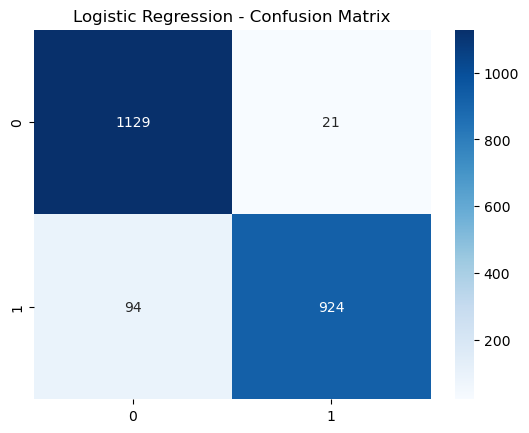

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1150
           1       0.98      0.91      0.94      1018

    accuracy                           0.95      2168
   macro avg       0.95      0.94      0.95      2168
weighted avg       0.95      0.95      0.95      2168


Decision Tree Performance:
Accuracy: 94.33%


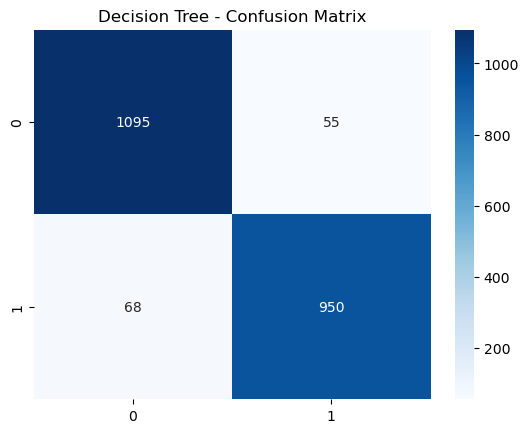

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1150
           1       0.95      0.93      0.94      1018

    accuracy                           0.94      2168
   macro avg       0.94      0.94      0.94      2168
weighted avg       0.94      0.94      0.94      2168


Random Forest Performance:
Accuracy: 95.94%


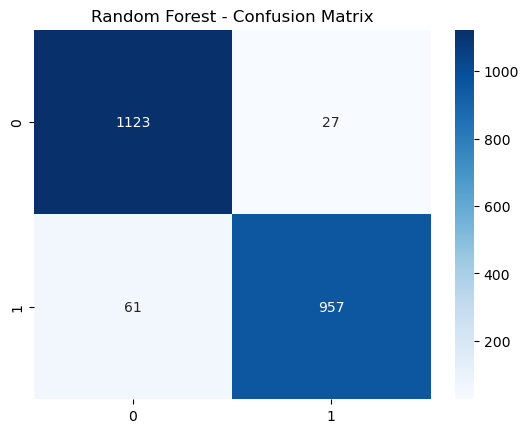

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1150
           1       0.97      0.94      0.96      1018

    accuracy                           0.96      2168
   macro avg       0.96      0.96      0.96      2168
weighted avg       0.96      0.96      0.96      2168

Training Neural Network (manual configuration)...

Neural Network Performance:
Accuracy: 91.51%


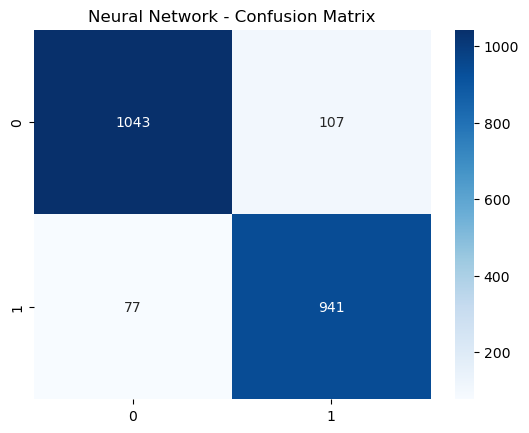

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1150
           1       0.90      0.92      0.91      1018

    accuracy                           0.92      2168
   macro avg       0.91      0.92      0.91      2168
weighted avg       0.92      0.92      0.92      2168



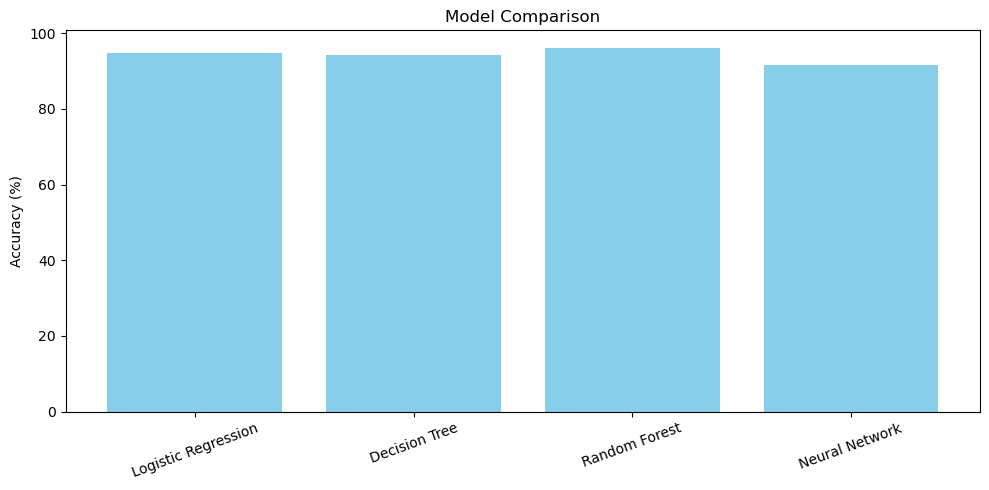

Best Model: Random Forest (95.94%)
Prediction: Popular with confidence 94.00%


In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

# Load dataset
df = pd.read_csv('googleplaystore.csv')

# Drop irrelevant columns
df.drop(['App', 'Last Updated', 'Current Ver'], axis=1, inplace=True)

# Handle missing values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.dropna(inplace=True)

# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean and convert Installs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Create binary target variable 'Success'
df['Success'] = np.where(df['Installs'] > 100000, 1, 0)

# Convert Price to numeric
df['Price'] = df['Price'].replace('Free', '0')
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].fillna(0, inplace=True)

# Handle Size
def size_to_kb(size):
    try:
        if size.endswith('M'):
            return float(size[:-1]) * 1024
        elif size.endswith('k'):
            return float(size[:-1])
        else:
            return np.nan
    except:
        return np.nan

df['Size'] = df['Size'].apply(lambda x: size_to_kb(x) if x not in ['Varies with device'] else np.nan)
df['Size'].fillna(df['Size'].median(), inplace=True)

# Clean 'Android Ver' and convert to numeric categories
df['Android Ver'] = df['Android Ver'].str.extract('(\d+\.\d+)')  # extract version like 4.1, 5.0
df['Android Ver'] = pd.to_numeric(df['Android Ver'], errors='coerce')
df['Android Ver'].fillna(df['Android Ver'].median(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Category', 'Type', 'Content Rating', 'Genres'], drop_first=True)

# Split features and labels
X = df.drop(['Success', 'Installs'], axis=1)
y = df['Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store model accuracies
accuracies = {}

# Evaluate model
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc * 100
    print(f'\n{name} Performance:')
    print(f'Accuracy: {acc * 100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=200)
evaluate_model(logistic_model, 'Logistic Regression')

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, 'Decision Tree')

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100)
evaluate_model(random_forest_model, 'Random Forest')

# Neural Network (Manual Configuration)
print("Training Neural Network (manual configuration)...")
ann_model = MLPClassifier(hidden_layer_sizes=(1024, 512, 256), max_iter=300, random_state=42)
evaluate_model(ann_model, 'Neural Network')


# Compare Model Accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Best Model Info
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]
print(f'Best Model: {best_model_name} ({best_model_accuracy:.2f}%)')

# Save the best model
best_model = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Neural Network (Tuned)': ann_model
}[best_model_name]

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

# Prediction Function
def predict_new_value(model, new_data):
    prediction = model.predict(new_data)
    probability = model.predict_proba(new_data)[0][1] * 100
    result = 'Popular' if prediction[0] == 1 else 'Unpopular'
    return result, probability

# Example: Predict using a sample from test set
new_data = X_test.iloc[[0]]
result, prob = predict_new_value(best_model, new_data)
print(f'Prediction: {result} with confidence {prob:.2f}%')
